READING ALL TYPES OF DATA and Transformations


TEXT

"Natural language processing (NLP) is a field of artificial intelligence that focuses on the interaction between computers and humans through natural language. NLP techniques enable computers to understand, interpret, and generate human language in a way that is valuable and meaningful."


Tokenization

In [5]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

text = "Natural language processing (NLP) is a field of artificial intelligence that focuses on the interaction between computers and humans through natural language. NLP techniques enable computers to understand, interpret, and generate human language in a way that is valuable and meaningful."

tokens = word_tokenize(text)
print(tokens)

###########   OR       ##################


# import spacy

# nlp = spacy.load("en_core_web_sm")

# text = "Natural language processing (NLP) is a field of artificial intelligence that focuses on the interaction between computers and humans through natural language. NLP techniques enable computers to understand, interpret, and generate human language in a way that is valuable and meaningful."

# doc = nlp(text)
# tokens = [token.text for token in doc]
# print(tokens)

['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'field', 'of', 'artificial', 'intelligence', 'that', 'focuses', 'on', 'the', 'interaction', 'between', 'computers', 'and', 'humans', 'through', 'natural', 'language', '.', 'NLP', 'techniques', 'enable', 'computers', 'to', 'understand', ',', 'interpret', ',', 'and', 'generate', 'human', 'language', 'in', 'a', 'way', 'that', 'is', 'valuable', 'and', 'meaningful', '.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Stopword removal

In [7]:
lemmatized_tokens = [token.lemma_ for token in doc]
print(lemmatized_tokens)

['natural', 'language', 'processing', '(', 'NLP', ')', 'be', 'a', 'field', 'of', 'artificial', 'intelligence', 'that', 'focus', 'on', 'the', 'interaction', 'between', 'computer', 'and', 'human', 'through', 'natural', 'language', '.', 'NLP', 'technique', 'enable', 'computer', 'to', 'understand', ',', 'interpret', ',', 'and', 'generate', 'human', 'language', 'in', 'a', 'way', 'that', 'be', 'valuable', 'and', 'meaningful', '.']


Text Cleaning

In [8]:
cleaned_text = ' '.join([token.text for token in doc if not token.is_punct])
print(cleaned_text)

Natural language processing NLP is a field of artificial intelligence that focuses on the interaction between computers and humans through natural language NLP techniques enable computers to understand interpret and generate human language in a way that is valuable and meaningful


Text Vectorization (Term Frequency-Inverse Document Frequency - TF-IDF)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example corpus (list of documents)
corpus = ["Natural language processing (NLP) is a field of artificial intelligence...",
          "NLP techniques enable computers to understand, interpret, and generate human language."]

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Print TF-IDF values for each term
for i, doc in enumerate(corpus):
    print(f"TF-IDF Vector for Document {i+1}:")
    for j, term in enumerate(feature_names):
        print(f"{term}: {tfidf_matrix[i, j]}")


TF-IDF Vector for Document 1:
and: 0.0
artificial: 0.35327776613855977
computers: 0.0
enable: 0.0
field: 0.35327776613855977
generate: 0.0
human: 0.0
intelligence: 0.35327776613855977
interpret: 0.0
is: 0.35327776613855977
language: 0.2513600402461016
natural: 0.35327776613855977
nlp: 0.2513600402461016
of: 0.35327776613855977
processing: 0.35327776613855977
techniques: 0.0
to: 0.0
understand: 0.0
TF-IDF Vector for Document 2:
and: 0.3160304990863645
artificial: 0.0
computers: 0.3160304990863645
enable: 0.3160304990863645
field: 0.0
generate: 0.3160304990863645
human: 0.3160304990863645
intelligence: 0.0
interpret: 0.3160304990863645
is: 0.0
language: 0.22485830296545706
natural: 0.0
nlp: 0.22485830296545706
of: 0.0
processing: 0.0
techniques: 0.3160304990863645
to: 0.3160304990863645
understand: 0.3160304990863645


Sentiment analysis

In [28]:
from textblob import TextBlob


text = "This is a great product. I love it!"

# Create a TextBlob object
blob = TextBlob(text)

# Analyze sentiment
sentiment = blob.sentiment

# The sentiment object has two properties: polarity and subjectivity
polarity = sentiment.polarity  # Range from -1 (negative) to 1 (positive)
subjectivity = sentiment.subjectivity  # Range from 0 (objective) to 1 (subjective)


# Check polarity and subjectivity for explicit labels
if polarity > 0:
    sentiment_label = "Positive"
elif polarity < 0:
    sentiment_label = "Negative"
else:
    sentiment_label = "Neutral"

print(f"Sentiment: {sentiment_label}")
print(f"Polarity: {polarity}")
print(f"Subjectivity: {subjectivity}")


Sentiment: Positive
Polarity: 0.7125
Subjectivity: 0.675


NER (NAME ENTITY RECOGNITION)

In [14]:
# NER using spaCy
text = "Apple Inc. was founded by Steve Jobs in Cupertino, California. It is a technology company."

# Process the text with spaCy
doc = nlp(text)

# Extract named entities
entities = [(entity.text, entity.label_) for entity in doc.ents]
print(entities)


[('Apple Inc.', 'ORG'), ('Steve Jobs', 'PERSON'), ('Cupertino', 'GPE'), ('California', 'GPE')]


IMAGE

Reading and displaying image

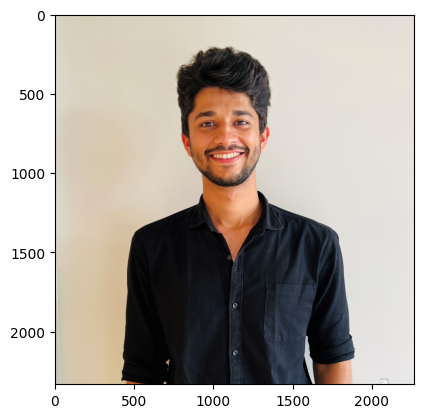

In [37]:
import cv2
import matplotlib.pyplot as plt

# Load an image from file
image = cv2.imread('divesh.jpg')

# Convert the BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)



Applying Blur

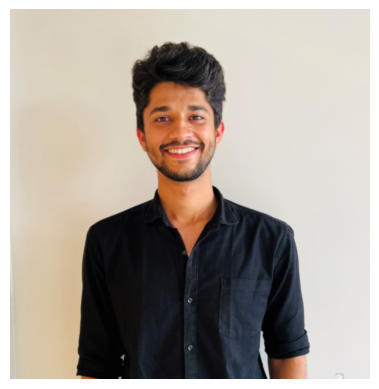

In [46]:
# Apply Gaussian blur to the image
blurred_image = cv2.GaussianBlur(image, (15, 15), 0)

# Convert BGR image to RGB for displaying with matplotlib
blurred_image_rgb = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)

# Display the blurred image
plt.imshow(blurred_image_rgb)
plt.axis('off')
plt.show()


Grayscale COnversion

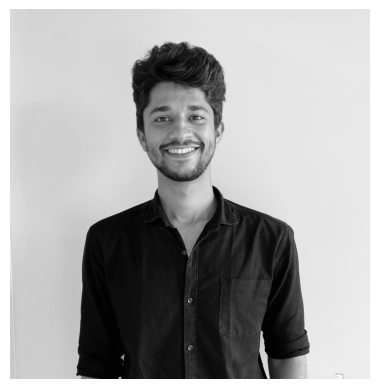

In [47]:
# Convert the image to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')
plt.show()


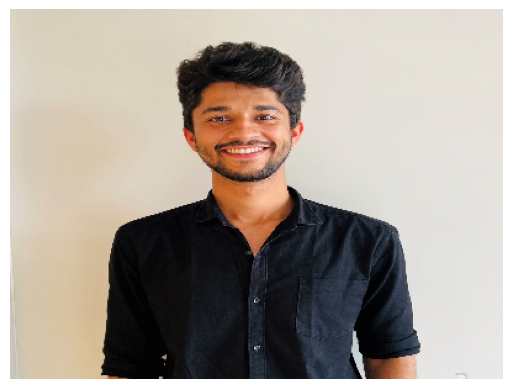

In [49]:
import cv2
import matplotlib.pyplot as plt

# Load an image from file
image = cv2.imread('divesh.jpg')

width , height = 400 , 300
resized_image = cv2.resize(image , (width , height))

resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

plt.imshow(resized_image_rgb)
plt.axis('off')
plt.show()

Changing RGB to only RED

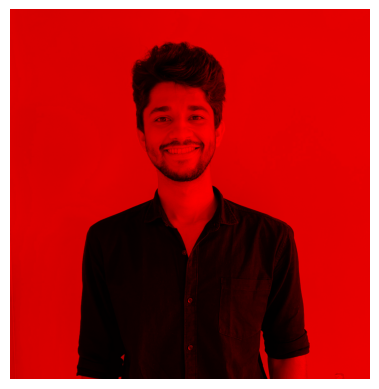

In [52]:
import cv2
import matplotlib.pyplot as plt

# Load an image from file
image = cv2.imread('divesh.jpg')

# Set green and blue channels to 0 (remove green and blue)
image_red = image.copy()
image_red[:, :, 0] = 0
image_red[:, :,1] = 0


# Convert BGR image to RGB for displaying with matplotlib
image_red_rgb = cv2.cvtColor(image_red, cv2.COLOR_BGR2RGB)

# Display the red-filtered image
plt.imshow(image_red_rgb)
plt.axis('off')
plt.show()


VIDEO

Reading and opening video

In [2]:
import cv2

# Open the video file for reading
video_capture = cv2.VideoCapture('divesh.mp4')

# Check if the video file opened successfully
if not video_capture.isOpened():
    print("Error: Could not open video file.")
    exit()

while True:
    # Read a frame from the video
    ret, frame = video_capture.read()
    
    if not ret:
        break
    
    # Display the frame
    cv2.imshow('Landscape Video', frame)
    
    # Check for the "Esc" key press to exit
    key = cv2.waitKey(30)
    if key == 27:  # 27 is the ASCII code for the "Esc" key
        break

# Release the video object and close the OpenCV window
video_capture.release()
cv2.destroyAllWindows()


Video in grayscale

In [3]:
import cv2

# Open the video file for reading
video_capture = cv2.VideoCapture('divesh.mp4')

# Check if the video file opened successfully
if not video_capture.isOpened():
    print("Error: Could not open video file.")
    exit()

while True:
    # Read a frame from the video
    ret, frame = video_capture.read()
    
    if not ret:
        break
    
    # Convert the frame to grayscale
    grayscale_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Display the grayscale frame
    cv2.imshow('Grayscale Video', grayscale_frame)
    
    # Check for the "Esc" key press to exit
    key = cv2.waitKey(30)
    if key == 27:  # 27 is the ASCII code for the "Esc" key
        break

# Release the video object and close the OpenCV window
video_capture.release()
cv2.destroyAllWindows()


Resizing and saving video

In [4]:
import cv2

# Open the video file for reading
video_capture = cv2.VideoCapture('divesh.mp4')

# Check if the video file opened successfully
if not video_capture.isOpened():
    print("Error: Could not open video file.")
    exit()

# Get the original video's width and height
frame_width = int(video_capture.get(3))  # Width of the frames
frame_height = int(video_capture.get(4))  # Height of the frames

# Define the codec and create a VideoWriter object to save the resized video
output_width = 640  # New width for the resized frames
output_height = 480  # New height for the resized frames
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Video codec (MP4 format)
out = cv2.VideoWriter('output_video.mp4', fourcc, 30, (output_width, output_height))

while True:
    # Read a frame from the video
    ret, frame = video_capture.read()
    
    if not ret:
        break
    
    # Resize the frame to the desired width and height
    resized_frame = cv2.resize(frame, (output_width, output_height))
    
    # Write the resized frame to the output video
    out.write(resized_frame)

# Release the video objects
video_capture.release()
out.release()

print("Resized video saved as 'output_video.mp4'")


Resized video saved as 'output_video.mp4'


FIlterign video

In [3]:
import cv2

# Open the video file for reading
video_capture = cv2.VideoCapture('divesh.mp4')

# Check if the video file opened successfully
if not video_capture.isOpened():
    print("Error: Could not open video file.")
    exit()

# Define the codec and create a VideoWriter object to save the filtered video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Video codec (MP4 format)
output = cv2.VideoWriter('output_video.mp4', fourcc, 30, (640, 480))

while True:
    # Read a frame from the video
    ret, frame = video_capture.read()
    
    if not ret:
        break
    
    # Apply Gaussian blur to the frame
    blurred_frame = cv2.GaussianBlur(frame, (15, 15), 0)
    
    # Write the filtered frame to the output video
    output.write(blurred_frame)

# Release the video objects
video_capture.release()
output.release()

print("Filtered video saved as 'output_video.mp4'")


Filtered video saved as 'output_video.mp4'


AUDIO

Loading MP3 and transformations

In [7]:
# brew install ffmpeg
# pip install pydub
from pydub import AudioSegment

audio = AudioSegment.from_wav("output.wav")

# boost volume by 6dB
audio = audio + 6

# repeat the clip twice
audio = audio * 2

# 2 sec fade in
audio = audio.fade_in(2000)

audio.export("mashup.mp3", format="mp3")

Changing audio format

In [ ]:
from pydub import AudioSegment

# Load the audio clip
audio = AudioSegment.from_mp3('input.mp3')

# Convert it to WAV format
audio.export('output.wav', format='wav')


Changing audio Bitrate

In [ ]:
from pydub import AudioSegment

# Load the audio clip
audio = AudioSegment.from_mp3('input.mp3')

# Set a new target bitrate (256 kbps)
audio = audio.set_frame_rate(256000)

# Export the modified audio
audio.export('output.mp3', format='mp3')


Change Audio Sample Rate:

In [ ]:
from pydub import AudioSegment

# Load the audio clip
audio = AudioSegment.from_wav('input.wav')

# Set a new target sample rate (48 kHz)
audio = audio.set_frame_rate(48000)

# Export the modified audio
audio.export('output.wav', format='wav')


Trim Audio:

In [ ]:
from pydub import AudioSegment

# Load the audio clip
audio = AudioSegment.from_mp3('input.mp3')

# Trim audio from 10 seconds to 20 seconds
trimmed_audio = audio[10000:20000]

# Export the trimmed audio
trimmed_audio.export('output.mp3', format='mp3')


Plot Audio

16000
80000
5.0 seconds
(80000,)


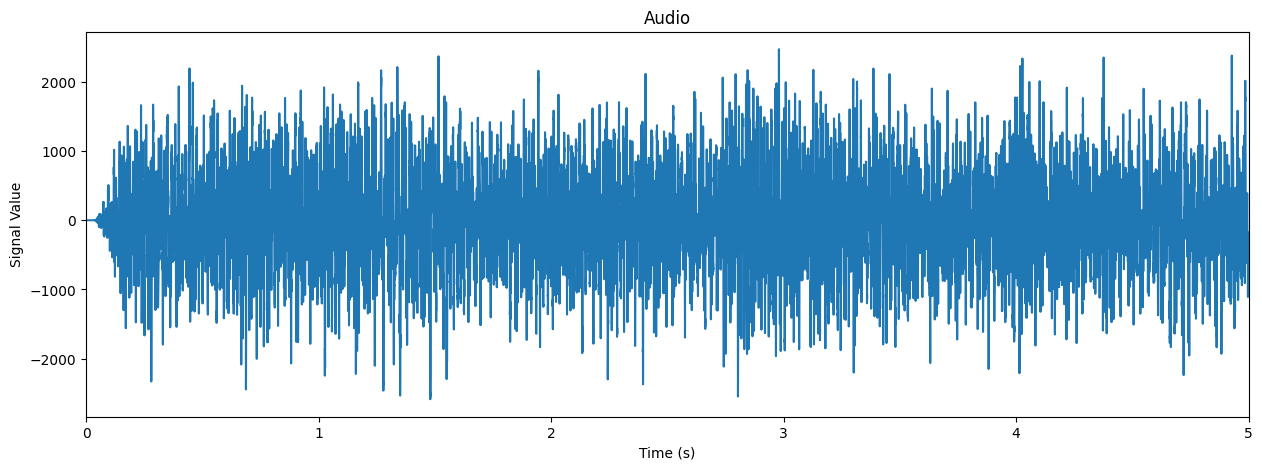

c:\Users\djadh\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_axes.py:7774: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


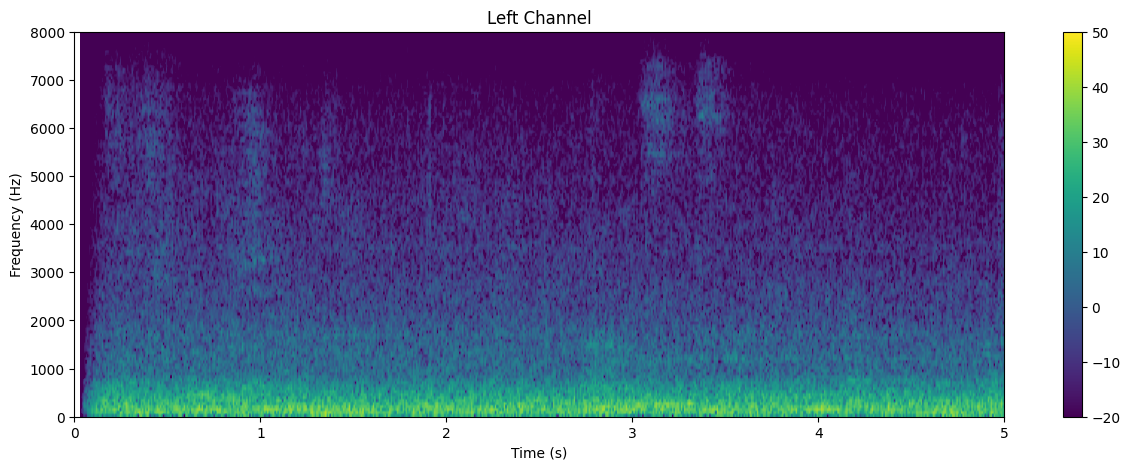

In [3]:
import wave
import numpy as np
import matplotlib.pyplot as plt

wav_obj = wave.open('output.wav', 'r')

sample_freq = wav_obj.getframerate()
print(sample_freq)

n_samples = wav_obj.getnframes()
print(n_samples)

t_audio = n_samples/sample_freq
print(t_audio, "seconds")

signal_wave = wav_obj.readframes(n_samples)
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
print(signal_array.shape)

# for stereo:
#l_channel = signal_array[0::2]
#r_channel = signal_array[1::2]

times = np.linspace(0, n_samples/sample_freq, num=n_samples)

plt.figure(figsize=(15, 5))
plt.plot(times, signal_array)
plt.title('Audio')
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.show()

plt.figure(figsize=(15, 5))
plt.specgram(signal_array, Fs=sample_freq, vmin=-20, vmax=50)
plt.title('Left Channel')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.colorbar()
plt.show()